<a href="https://www.kaggle.com/code/aleksandrmorozov123/3d-computer-vision?scriptVersionId=290142682" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/part-processing-dataset/Pytorch_Model_Save/Pytorch_Model_Save/Model_1.pth
/kaggle/input/part-processing-dataset/Pytorch_Model_Save/Pytorch_Model_Save/Model_4.pth
/kaggle/input/part-processing-dataset/Pytorch_Model_Save/Pytorch_Model_Save/Base_Model_0.pth
/kaggle/input/part-processing-dataset/Pytorch_Model_Save/Pytorch_Model_Save/Model_3.pth
/kaggle/input/part-processing-dataset/Pytorch_Model_Save/Pytorch_Model_Save/Model_2.pth
/kaggle/input/part-processing-dataset/Meshes/Meshes/Data_Mesh_Target.csv
/kaggle/input/part-processing-dataset/Meshes/Meshes/1B_FabInc/val/Waterjet/Station1-12 - Station1-02-1.obj
/kaggle/input/part-processing-dataset/Meshes/Meshes/1B_FabInc/val/Panel Saw/Cab2-10 - Cab2-06-1.obj
/kaggle/input/part-processing-dataset/Meshes/Meshes/1B_FabInc/val/Panel Saw/Table1-02 - Table1-01-1.obj
/kaggle/input/part-processing-dataset/Meshes/Meshes/1B_FabInc/val/Panel Saw/Shelf1-43.obj
/kaggle/input/part-processing-dataset/Meshes/Meshes/1B_FabInc/val/Panel Saw/Bench

**In this notebook I'll work with methods of 3D Computer Vision**

In [2]:
!pip install open3d

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 108.6 MB/s eta 0:00:00


In [3]:
import sys
import os

# add the directory containing 'examples' to the Python path
notebook_directory = os.getcwd()
parent_directory = os.path.dirname(notebook_directory)  # Parent directory
sys.path.append(parent_directory)

In [4]:
import open3d as op3
import numpy as np
import matplotlib.pyplot as plt

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [5]:
sample_ply_data = op3.data.PLYPointCloud()
pcd = op3.io.read_point_cloud(sample_ply_data.path)

[Open3D INFO] Downloading https://github.com/isl-org/open3d_downloads/releases/download/20220201-data/fragment.ply
[Open3D INFO] Downloaded to /root/open3d_data/download/PLYPointCloud/fragment.ply


In [6]:
import plotly.io as pio
pio.renderers.default = 'iframe'

downpcd = pcd.voxel_down_sample(voxel_size=0.02)
op3.visualization.draw_plotly([downpcd],
                             zoom=0.3412,
                             front=[0.4257, -0.2125, -0.8795],
                             lookat=[2.6172, 2.0475, 1.532],
                             up=[-0.0694, -0.9768, 0.2024])

**Mesh visualization**

In [7]:
# Download data
dataset = op3.data.KnotMesh()
mesh = op3.io.read_triangle_mesh(dataset.path) 

[Open3D INFO] Downloading https://github.com/isl-org/open3d_downloads/releases/download/20220201-data/KnotMesh.ply
[Open3D INFO] Downloaded to /root/open3d_data/download/KnotMesh/KnotMesh.ply


In [8]:
print(mesh)
# Open3D provides direct memory access to these fields via numpy
print('Vertices:')
print(np.asarray(mesh.vertices))
print('Triangles:')
print(np.asarray(mesh.triangles))

TriangleMesh with 1440 points and 2880 triangles.
Vertices:
[[  4.51268387  28.68865967 -76.55680847]
 [  7.63622284  35.52046967 -69.78063965]
 [  6.21986008  44.22465134 -64.82303619]
 ...
 [-22.12651634  31.28466606 -87.37570953]
 [-13.91188431  25.4865818  -86.25827026]
 [ -5.27768707  23.36245346 -81.43279266]]
Triangles:
[[   0   12   13]
 [   0   13    1]
 [   1   13   14]
 ...
 [1438   11 1439]
 [1439   11    0]
 [1439    0 1428]]


In [9]:
pio.renderers.default = 'iframe'
op3.visualization.draw_plotly([mesh],
                             zoom=0.3412,
                             front=[0.4257, -0.2125, -0.8795],
                             lookat=[2.6172, 2.0475, 1.532],
                             up=[-0.0694, -0.9768, 0.2024])

**Point cloud visualization**

In [10]:
# Load pcd file
pc_pcd = op3.io.read_point_cloud("/kaggle/input/point-cloud-lidar-toronto-3d/L004.ply")
# Point Cloud info
print(pc_pcd)
print('Shape of points', np.asarray(pc_pcd.points).shape)
print('Shape of colors', np.asarray(pc_pcd.colors).shape) # no color data

PointCloud with 6747648 points.
Shape of points (6747648, 3)
Shape of colors (6747648, 3)


In [11]:
# PCD file info
print(dir(pc_pcd))

['HalfEdgeTriangleMesh', 'Image', 'LineSet', 'PointCloud', 'RGBDImage', 'TetraMesh', 'TriangleMesh', 'Type', 'Unspecified', 'VoxelGrid', '__add__', '__class__', '__copy__', '__deepcopy__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'clear', 'cluster_dbscan', 'colors', 'compute_convex_hull', 'compute_mahalanobis_distance', 'compute_mean_and_covariance', 'compute_nearest_neighbor_distance', 'compute_point_cloud_distance', 'covariances', 'create_from_depth_image', 'create_from_rgbd_image', 'crop', 'detect_planar_patches', 'dimension', 'estimate_covariances', 'estimate_normals', 'estimate_point_covariances', 'farthest_point_down_sample', 'get_axis_aligned_bounding_box', 'get_center', 'get_geometry_type', '

**Visualizing with matplotlib**

In [12]:
cloud = op3.io.read_point_cloud("/kaggle/input/point-cloud-lidar-toronto-3d/L004.ply")
if cloud.is_empty(): exit()

In [13]:
cloud.estimate_normals(search_param=op3.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))

In [14]:
from mpl_toolkits import mplot3d
points = np.asarray(cloud.points)

colors = None
if cloud.has_colors():
    colors = np.asarray(cloud.colors)
elif cloud.has_normals():
    colors = (0.5, 0.5, 0.5) + np.asarray(cloud.normals) * 0.5
else:
    geometry.paint_uniform_color((1.0, 0.0, 0.0))
    colors = np.asarray(geometry.colors)

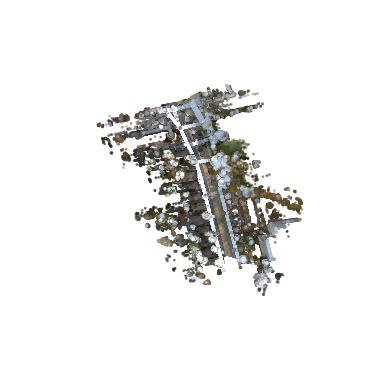

In [15]:
# single View
ax = plt.axes(projection='3d')
ax.view_init(90, -90)
ax.axis("off")
ax.scatter(points[:,0], points[:,1], points[:,2], s=1, c=colors)
plt.show()

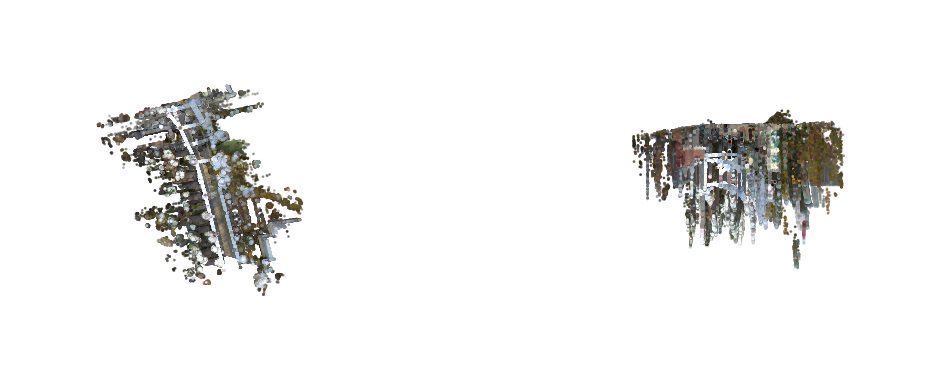

In [16]:
# multi View
figsize = plt.rcParams.get('figure.figsize')
fig = plt.figure(figsize=(figsize[0] * 2, figsize[1]))
ax1 = fig.add_subplot(1, 2, 1, projection = '3d')
ax2 = fig.add_subplot(1, 2, 2, projection = '3d')
ax1.axis("off")
ax1.view_init(90, -90) # front view
ax1.scatter(points[:,0], points[:,1], points[:,2], s=1, c=colors)
ax2.axis("off")
ax2.view_init(90 + 90, -90) # top view
ax2.scatter(points[:,0], points[:,1], points[:,2], s=1, c=colors)
plt.show()

**Visualization with Plotly**

In [17]:
import plotly.graph_objects as go

In [18]:
mesh = op3.io.read_triangle_mesh("/kaggle/input/part-processing-dataset/Meshes/Meshes/1A_FabInc_OBJ_Class/Metal Band Saw/Bench1-01 - Bench1-01-1.obj")
if mesh.is_empty(): exit()

In [19]:
if not mesh.has_vertex_normals(): mesh.compute_vertex_normals()
if not mesh.has_triangle_normals(): mesh.compute_triangle_normals()

In [20]:
triangles = np.asarray(mesh.triangles)
vertices = np.asarray(mesh.vertices)
colors = None
if mesh.has_triangle_normals():
    colors = (0.5, 0.5, 0.5) + np.asarray(mesh.triangle_normals) * 0.5
    colors = tuple(map(tuple, colors))
else:
    colors = (1.0, 0.0, 0.0)

In [21]:
fig = go.Figure(
    data=[
        go.Mesh3d(
            x=vertices[:,0],
            y=vertices[:,1],
            z=vertices[:,2],
            i=triangles[:,0],
            j=triangles[:,1],
            k=triangles[:,2],
            facecolor=colors,
            opacity=0.50)
    ],
    layout=dict(
        scene=dict(
            xaxis=dict(visible=False),
            yaxis=dict(visible=False),
            zaxis=dict(visible=False)
        )
    )
)
fig.show()

In [22]:
mesh_1 = op3.io.read_triangle_mesh("/kaggle/input/part-processing-dataset/Meshes/Meshes/1B_FabInc/train/Waterjet/Station1-10 - Station1-01-1.obj")
if mesh_1.is_empty(): exit()

In [23]:
if not mesh_1.has_vertex_normals(): mesh_1.compute_vertex_normals()
if not mesh_1.has_triangle_normals(): mesh_1.compute_triangle_normals()

In [24]:
triangles = np.asarray(mesh_1.triangles)
vertices = np.asarray(mesh_1.vertices)
colors = None
if mesh_1.has_triangle_normals():
    colors = (0.5, 0.5, 0.5) + np.asarray(mesh_1.triangle_normals) * 0.5
    colors = tuple(map(tuple, colors))
else:
    colors = (1.0, 0.0, 0.0)

In [25]:
fig = go.Figure(
    data=[
        go.Mesh3d(
            x=vertices[:,0],
            y=vertices[:,1],
            z=vertices[:,2],
            i=triangles[:,0],
            j=triangles[:,1],
            k=triangles[:,2],
            facecolor=colors,
            opacity=0.50)
    ],
    layout=dict(
        scene=dict(
            xaxis=dict(visible=False),
            yaxis=dict(visible=False),
            zaxis=dict(visible=False)
        )
    )
)
fig.show()